In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_parquet('../data/curated/clean_stats_13-22')

In [26]:
df.columns

Index(['match_id', 'match_home_team', 'match_away_team', 'match_date',
       'match_round', 'match_home_team_goals', 'match_home_team_behinds',
       'match_home_team_score', 'match_away_team_goals',
       'match_away_team_behinds',
       ...
       'f50_ground_ball_gets_total', 'ground_ball_gets_total',
       'hitouts_to_advantage_total', 'hitout_win_percentage_total',
       'intercept_marks_total', 'shots_at_goal_total', 'spoils_total',
       'coaches_votes', 'average_votes_prev', 'brownlow_votes'],
      dtype='object', length=160)

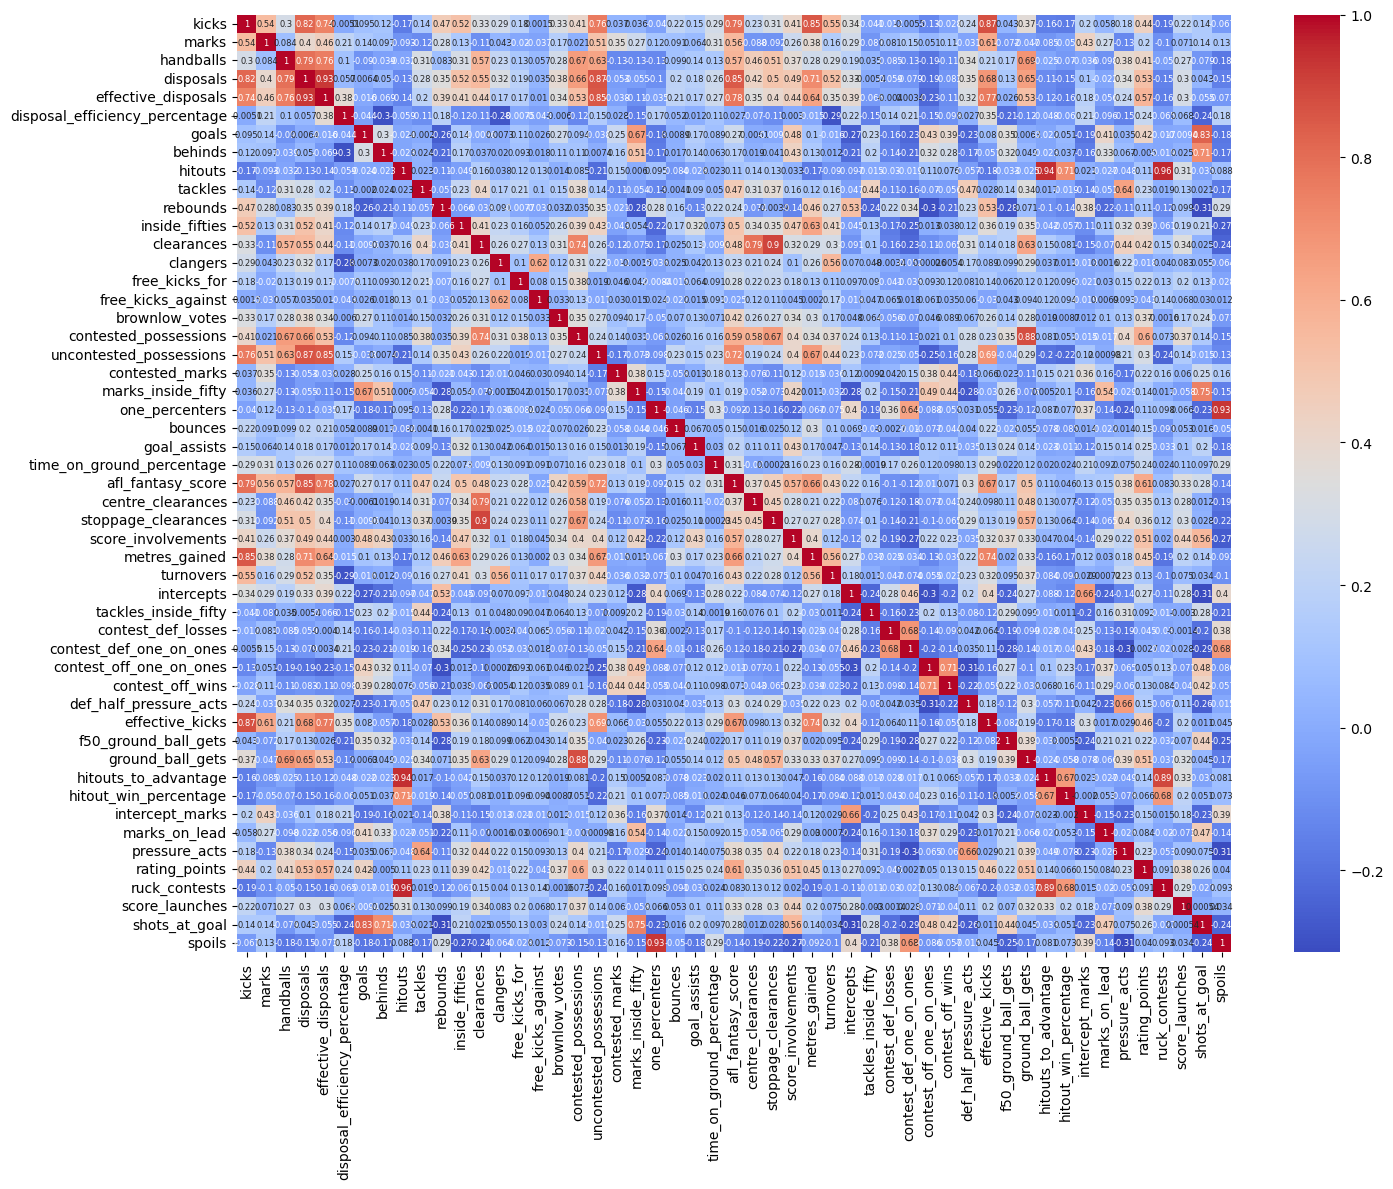

In [10]:
correlation_matrix = df[['kicks', 'marks', 'handballs', 'disposals',
       'effective_disposals', 'disposal_efficiency_percentage', 'goals',
       'behinds', 'hitouts', 'tackles', 'rebounds', 'inside_fifties',
       'clearances', 'clangers', 'free_kicks_for', 'free_kicks_against',
       'brownlow_votes', 'contested_possessions', 'uncontested_possessions',
       'contested_marks', 'marks_inside_fifty', 'one_percenters', 'bounces',
       'goal_assists', 'time_on_ground_percentage', 'afl_fantasy_score',
       'centre_clearances', 'stoppage_clearances', 'score_involvements',
       'metres_gained', 'turnovers', 'intercepts', 'tackles_inside_fifty',
       'contest_def_losses', 'contest_def_one_on_ones',
       'contest_off_one_on_ones', 'contest_off_wins', 'def_half_pressure_acts',
       'effective_kicks', 'f50_ground_ball_gets', 'ground_ball_gets',
       'hitouts_to_advantage', 'hitout_win_percentage', 'intercept_marks',
       'marks_on_lead', 'pressure_acts', 'rating_points', 'ruck_contests',
       'score_launches', 'shots_at_goal', 'spoils']].corr()

plt.subplots(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm',
            annot=True, annot_kws={"size": 6})
plt.tight_layout()
plt.show()

In [28]:
df.query('player_position == "SUB" & time_on_ground_percentage < 50')

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,...,f50_ground_ball_gets_total,ground_ball_gets_total,hitouts_to_advantage_total,hitout_win_percentage_total,intercept_marks_total,shots_at_goal_total,spoils_total,coaches_votes,average_votes_prev,brownlow_votes
8650,14167,Adelaide,Essendon,2013-03-22,1,11,16,82,18,9,...,36,197,21,164,27,53,69,0.0,0.0,0.0
8651,14167,Adelaide,Essendon,2013-03-22,1,11,16,82,18,9,...,36,197,21,164,27,53,69,0.0,0.0,0.0
8668,14168,Fremantle,West Coast,2013-03-23,1,16,12,108,11,14,...,37,202,19,245,32,54,62,0.0,0.0,0.0
8711,14168,Fremantle,West Coast,2013-03-23,1,16,12,108,11,14,...,37,202,19,245,32,54,62,0.0,0.0,0.0
8739,14169,Carlton,Richmond,2013-03-28,1,14,17,101,14,22,...,40,220,22,203,23,70,70,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93537,16342,Essendon,Richmond,2022-08-20,23,11,9,75,21,15,...,35,173,16,160,20,59,59,0.0,0.0,0.0
93578,16343,Port Adelaide,Adelaide,2022-08-20,23,16,15,111,7,13,...,36,191,22,272,36,53,78,0.0,0.0,0.0
93594,16343,Port Adelaide,Adelaide,2022-08-20,23,16,15,111,7,13,...,36,191,22,272,36,53,78,0.0,0.0,0.0
93706,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,37,197,21,149,31,53,66,0.0,0.0,0.0


In [29]:
columns = [
    'player_first_name',
    'player_last_name',
    'player_team',
    'season',
    'match_round',
    'match_winner',
    'goals',
    'disposals',
    'time_on_ground_percentage',
    'brownlow_votes'
]

In [30]:
polled = df.query('brownlow_votes != 0')

In [46]:
convert_pos = {
    'CHB': 'key_defender',
    'RR': 'rover',
    'HFFL': 'forward',
    'HBFR': 'defender',
    'HBFL': 'defender',
    'C': 'rover',
    'FB': 'key_defender',
    'CHF': 'key_forward',
    'WL': 'wing',
    'INT': 'INT',
    'FPL': 'forward',
    'R': 'rover',
    'WR': 'wing',
    'RK': 'ruck',
    'BPR': 'defender',
    'FF': 'key_forward',
    'SUB': 'sub',
    'HFFR': 'forward',
    'FPR': 'forward',
    'BPL': 'defender'
}

polled.replace({'player_position': convert_pos}, inplace=True)

/var/folders/_d/tnkg6yhj7xj4rxgh61bmdwtr0000gn/T/ipykernel_35877/2873368531.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polled.replace({'player_position': convert_pos}, inplace=True)


<Axes: ylabel='player_position'>

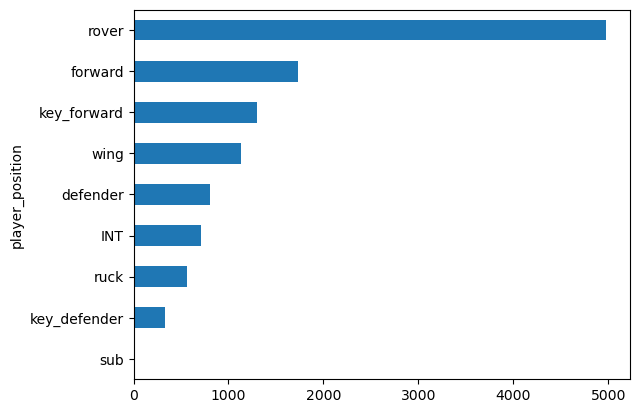

In [47]:
# there is a reason it is called the midfielders medal
polled.groupby('player_position')['brownlow_votes'].sum().sort_values().plot(kind='barh')

<Axes: ylabel='player_position'>

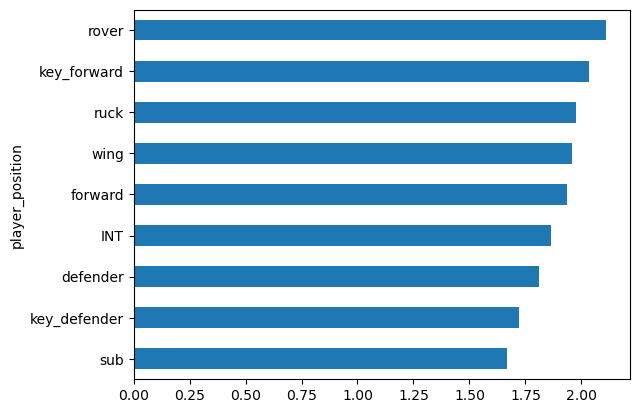

In [48]:
polled.groupby('player_position')['brownlow_votes'].mean().sort_values().plot(kind='barh')

In [31]:
polled.query('player_position == "SUB"')[columns]

,player_first_name,player_last_name,player_team,season,match_round,match_winner,goals,disposals,time_on_ground_percentage,brownlow_votes
13503,Ollie,Wines,Port Adelaide,2013,14,Port Adelaide,1,26,55,1.0
25984,Ben,Howlett,Essendon,2015,1,Sydney,0,19,82,3.0
88876,Oliver,Henry,Collingwood,2022,10,Collingwood,4,13,62,1.0


In [32]:
with pd.option_context('display.max_columns', 160):
    display(polled.loc[[25984]])

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,match_away_team_score,match_margin,match_winner,season,player_id,player_first_name,player_last_name,player_team,is_captain,player_position,kicks,marks,handballs,disposals,effective_disposals,disposal_efficiency_percentage,goals,behinds,hitouts,tackles,rebounds,inside_fifties,clearances,clangers,free_kicks_for,free_kicks_against,contested_possessions,uncontested_possessions,contested_marks,marks_inside_fifty,one_percenters,bounces,goal_assists,time_on_ground_percentage,afl_fantasy_score,SC,centre_clearances,stoppage_clearances,score_involvements,metres_gained,turnovers,intercepts,tackles_inside_fifty,contest_def_losses,contest_def_one_on_ones,contest_off_one_on_ones,contest_off_wins,def_half_pressure_acts,effective_kicks,f50_ground_ball_gets,ground_ball_gets,hitouts_to_advantage,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,ruck_contests,score_launches,shots_at_goal,spoils,rating_points,winning_margin,won_match,30_and_2,high_goal_scorer,kicks_proportion,marks_proportion,handballs_proportion,disposals_proportion,effective_disposals_proportion,goals_proportion,afl_fantasy_score_proportion,SC_proportion,behinds_proportion,hitouts_proportion,tackles_proportion,rebounds_proportion,inside_fifties_proportion,clearances_proportion,clangers_proportion,free_kicks_for_proportion,free_kicks_against_proportion,contested_possessions_proportion,uncontested_possessions_proportion,contested_marks_proportion,marks_inside_fifty_proportion,one_percenters_proportion,goal_assists_proportion,centre_clearances_proportion,stoppage_clearances_proportion,score_involvements_proportion,metres_gained_proportion,turnovers_proportion,intercepts_proportion,tackles_inside_fifty_proportion,contest_def_one_on_ones_proportion,contest_off_one_on_ones_proportion,def_half_pressure_acts_proportion,effective_kicks_proportion,f50_ground_ball_gets_proportion,ground_ball_gets_proportion,hitouts_to_advantage_proportion,hitout_win_percentage_proportion,intercept_marks_proportion,shots_at_goal_proportion,spoils_proportion,kicks_total,marks_total,handballs_total,disposals_total,effective_disposals_total,goals_total,afl_fantasy_score_total,SC_total,behinds_total,hitouts_total,tackles_total,rebounds_total,inside_fifties_total,clearances_total,clangers_total,free_kicks_for_total,free_kicks_against_total,contested_possessions_total,uncontested_possessions_total,contested_marks_total,marks_inside_fifty_total,one_percenters_total,goal_assists_total,centre_clearances_total,stoppage_clearances_total,score_involvements_total,metres_gained_total,turnovers_total,intercepts_total,tackles_inside_fifty_total,contest_def_one_on_ones_total,contest_off_one_on_ones_total,def_half_pressure_acts_total,effective_kicks_total,f50_ground_ball_gets_total,ground_ball_gets_total,hitouts_to_advantage_total,hitout_win_percentage_total,intercept_marks_total,shots_at_goal_total,spoils_total,coaches_votes,average_votes_prev,brownlow_votes
25984,14583,Sydney,Essendon,2015-04-04,1,10,12,72,9,6,60,12,Sydney,2015,11805,Ben,Howlett,Essendon,0,SUB,10,1,9,19,12,63.0,0,0,0,12,1,3,7,2,3,1,11,6,0,0,1,1,1,82,99,95.0,1,6,1,245,2,1,1,0,0,0,0,12,3,1,7,0,0,0,0,26,0,0,0,0,16,-12,0,0,0,0.023753,0.009091,0.030822,0.026648,0.025316,0.0,0.033974,0.02884,0.0,0.0,0.081081,0.012987,0.028846,0.063636,0.017699,0.061224,0.020408,0.033742,0.016529,0.0,0.0,0.009804,0.076923,0.05,0.068182,0.008929,0.0221,0.012821,0.00641,0.066667,0.0,0.0,0.042403,0.011905,0.033333,0.030837,0.0,0.0,0.0,0.0,0.0,421,110,292,713,474,19,2914,3294.0,15,114,148,77,104,110,113,49,49,326,363,8,7,102,13,20,88,112,11086,156,156,15,35,35,283,252,30,227,33,139,14,39,78,0.0,0.1,3.0


In [18]:
polled.query('time_on_ground_percentage < 65')[columns]

,player_first_name,player_last_name,player_team,match_date,match_winner,goals,disposals,time_on_ground_percentage,brownlow_votes
174,James,Magner,Melbourne,2012-03-31,Brisbane Lions,2,23,62,2.0
5903,Steve,Johnson,Geelong,2012-07-20,Geelong,2,22,58,1.0
13503,Ollie,Wines,Port Adelaide,2013-06-29,Port Adelaide,1,26,55,1.0
26019,Steele,Sidebottom,Collingwood,2015-04-04,Collingwood,2,19,55,2.0
27403,Jake,Stringer,Western Bulldogs,2015-04-26,Western Bulldogs,6,15,58,2.0
34539,Clayton,Oliver,Melbourne,2016-03-26,Melbourne,0,22,58,2.0
38846,Connor,Blakely,Fremantle,2016-06-11,Fremantle,0,29,61,3.0
51996,Touk,Miller,Gold Coast,2018-03-24,Gold Coast,0,21,62,2.0
65385,Lance,Franklin,Sydney,2019-06-21,Sydney,4,5,60,1.0
65660,Cameron,Guthrie,Geelong,2019-06-28,Geelong,2,22,63,1.0


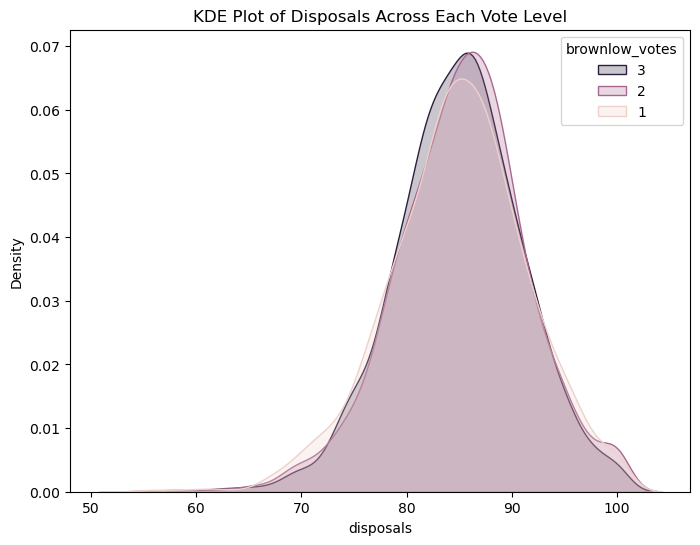

In [6]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=polled, x='time_on_ground_percentage', hue='brownlow_votes', fill=True, common_norm=False)
plt.title('KDE Plot of Disposals Across Each Vote Level')
plt.xlabel('disposals')
plt.ylabel('Density')
plt.legend([3,2,1,0], title='brownlow_votes')
plt.show()

In [118]:
# players poll 80% of the time when they achieve 5 or more goals in a match
# according to the 78 occurences from 2012-2022
df.query('goals >= 5')[columns].sort_values('brownlow_votes')

,player_first_name,player_last_name,player_team,match_date,match_winner,goals,disposals,brownlow_votes
9099,Max,King,St Kilda,2022-08-21,Sydney,5,12,0.0
53155,Josh J.,Kennedy,West Coast,2018-04-14,West Coast,5,13,0.0
52975,Jaidyn,Stephenson,Collingwood,2018-04-13,Collingwood,5,13,0.0
12487,Aaron,Black,North Melbourne,2013-06-02,North Melbourne,5,17,0.0
12602,James,Podsiadly,Geelong,2013-06-08,Geelong,5,13,0.0
...,...,...,...,...,...,...,...,...
59360,Jack,Riewoldt,Richmond,2018-08-11,Richmond,10,26,3.0
21214,Jarryd,Roughead,Hawthorn,2014-06-07,Hawthorn,8,24,3.0
59797,Lance,Franklin,Sydney,2018-08-18,Sydney,5,16,3.0
60252,Josh,Jenkins,Adelaide,2018-08-25,Adelaide,7,19,3.0


In [70]:
over_30_2 = df.query('disposals >= 30 & goals >= 2')[columns].sort_values('brownlow_votes')

In [76]:
# players poll 86% of the time when achieving 30+ disposals and 2+ goals
len(over_30_2.loc[over_30_2.brownlow_votes != 0]) / len(over_30_2)

0.8556701030927835

In [86]:
clear_10 = df.query('clearances >= 15')[columns].sort_values('brownlow_votes')

In [87]:
len(clear_10.loc[clear_10.brownlow_votes != 0]) / len(clear_10)

0.5294117647058824

In [28]:
def calc_percentage(query):
    
    return_df = df.query(query)[columns].sort_values('brownlow_votes')
    
    return len(return_df.loc[return_df.brownlow_votes != 0]) / len(return_df)

In [36]:
calc_percentage('time_on_ground_percentage < 50')

0.0

In [ ]:
common_statlines = [
    
]

In [105]:
polled = df.query('brownlow_votes != 0')

,match_id,match_home_team,match_away_team,match_date,match_round,season,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,...,hitouts_to_advantage,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils
11,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,0,0,23,19,0,2,2,1
16,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,7,44,2,0,18,9,79,2,1,0
17,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,0,0,16,21,0,1,2,2
58,13961,Richmond,Carlton,2012-03-29,1,2012,12,9,81,18,...,0,0,0,0,12,19,0,4,2,0
68,13961,Richmond,Carlton,2012-03-29,1,2012,12,9,81,18,...,5,34,1,0,24,20,44,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,16345,Carlton,Collingwood,2022-08-21,23,2022,10,14,74,11,...,0,0,1,1,15,7,0,0,0,0
9044,16345,Carlton,Collingwood,2022-08-21,23,2022,10,14,74,11,...,0,0,0,0,19,23,0,2,2,0
9063,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,0,0,14,15,0,2,0,0
9078,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,1,0,22,15,0,1,1,2


In [106]:
polled.query('match_winner == player_team')

/var/folders/_d/tnkg6yhj7xj4rxgh61bmdwtr0000gn/T/ipykernel_99971/3972693601.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  polled.query('match_winner == player_team')


,match_id,match_home_team,match_away_team,match_date,match_round,season,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,...,hitouts_to_advantage,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils
11,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,0,0,23,19,0,2,2,1
16,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,7,44,2,0,18,9,79,2,1,0
17,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,0,0,16,21,0,1,2,2
58,13961,Richmond,Carlton,2012-03-29,1,2012,12,9,81,18,...,0,0,0,0,12,19,0,4,2,0
68,13961,Richmond,Carlton,2012-03-29,1,2012,12,9,81,18,...,5,34,1,0,24,20,44,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,16343,Port Adelaide,Adelaide,2022-08-20,23,2022,16,15,111,7,...,0,33,1,4,6,13,3,1,7,1
8952,16343,Port Adelaide,Adelaide,2022-08-20,23,2022,16,15,111,7,...,0,0,0,0,19,18,0,1,2,0
8974,16344,Hawthorn,Western Bulldogs,2022-08-21,23,2022,10,4,64,12,...,0,0,1,0,21,16,0,2,2,0
8988,16344,Hawthorn,Western Bulldogs,2022-08-21,23,2022,10,4,64,12,...,0,0,0,0,24,15,0,2,2,0


In [107]:
df

,match_id,match_home_team,match_away_team,match_date,match_round,season,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,...,hitouts_to_advantage,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils
0,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,0,1,15,11,0,2,1,1
1,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,1,0,0,2,12,9,0,1,2,1
2,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,3,0,15,12,0,1,0,3
3,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,1,0,23,15,0,2,1,0
4,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,8,0,7,16,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,0,1,8,5,0,1,3,0
9104,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,1,0,21,6,0,1,1,0
9105,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,0,0,23,5,0,0,2,1
9106,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,0,3,13,2,0,2,2,0


In [111]:
df['30_2'] = ((df['disposals'] >= 30) & (df['goals'] >= 2)).astype(int)

In [112]:
df

,match_id,match_home_team,match_away_team,match_date,match_round,season,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,...,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,30_2
0,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,1,15,11,0,2,1,1,0
1,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,0,2,12,9,0,1,2,1,0
2,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,3,0,15,12,0,1,0,3,0
3,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,1,0,23,15,0,2,1,0,0
4,13960,Greater Western Sydney,Sydney,2012-03-24,1,2012,5,7,37,14,...,0,8,0,7,16,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,1,8,5,0,1,3,0,0
9104,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,1,0,21,6,0,1,1,0,0
9105,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,0,23,5,0,0,2,1,0
9106,16346,St Kilda,Sydney,2022-08-21,23,2022,11,8,74,13,...,0,0,3,13,2,0,2,2,0,0
